```
Nama          : Roikhatul Miskiyah
Kode Peserta  : PYTN-KS05-010
Batch         : 5
Assignment    : 3
```


**Outline:**
```
A. Logistic Regression
B. K-Nearest Neighbors
C. Support Vector Machine
D. Decision Tree
E. Random Forest
F. Naive Bayes
G. Confusion Matrix


*for each (A - G):
- Visualization min. 2 tipe grafik/ plot
- Pre-processing if needed
- Analysis algoritma yang dipilih
```

In [3]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# menggunakan dataset bank-additional-full
df = pd.read_csv("./dataset/bank-additional-full.csv", sep=";")

**Pre-Processing**

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.shape

(41188, 21)

In [8]:
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# identifikasi duplikat data
dup = df.duplicated()
dup

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
gab = df.loc[:, df.dtypes == object]
num = df.loc[:, df.dtypes != object]

gab = gab.copy()
le = preprocessing.LabelEncoder()

for i in gab:
    i_string = str(i)
    gab[i_string] = le.fit_transform(gab[i_string])

df = pd.concat([num, gab], axis=1)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,6,1,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,1,0,0,1,6,1,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,2,0,1,6,1,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,1,0,0,0,1,6,1,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,3,0,0,2,1,6,1,1,0


In [13]:
# separating features and result vectors
X = df.drop('y', axis=1).values
y = df['y'].values
print(X.shape, y.shape)

(41188, 20) (41188,)


In [14]:
# training and testing size
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=20
)
print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 32950
Test size: 8238


In [15]:
# Train Model
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    
    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    
    print(classification_report(y_test, test_pred))

---
# Logistic Regression

In [16]:
lr = LogisticRegression()
train_model(lr, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7328
           1       0.67      0.38      0.48       910

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



C:\Users\miskiyahr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Conclusion:**
    1.  Pemilihan algoritma logistic regression dari dataset bank-additional-full.csv adalah digunakan untuk mengukur hubungan antara variabel target (yang ingin diprediksi) dan variabel input (fitur yang digunakan) dengan fungsi logistik dari data nasabah yang menabung di bank.

---
# B. K-Nearest Neighbors

In [17]:
knn = KNeighborsClassifier()
train_model(knn, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7328
           1       0.58      0.48      0.52       910

    accuracy                           0.90      8238
   macro avg       0.76      0.72      0.74      8238
weighted avg       0.90      0.90      0.90      8238



**Conclusion:**
    1.  Pemilihan algoritma K-Nearest Neighbors dari dataset bank-additional-full.csv adalah digunakan untuk melakukan klasifikasi terhadap objek yang berdasarkan dari data pembelajaran yang jaraknya paling dekat dengan objek (nasabah) tersebut.

---
# C. Support Vector Machine

In [18]:
svm = SVC()
train_model(svm, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7328
           1       0.60      0.18      0.28       910

    accuracy                           0.90      8238
   macro avg       0.75      0.58      0.61      8238
weighted avg       0.87      0.90      0.87      8238



**Conclusion:**
    1.  Pemilihan algoritma support vector machine dari dataset bank-additional-full.csv adalah digunakan untuk  mencari hyperplane (fungsi yang digunakan sebagai pemisah antar kelas yang satu dengan yang lain) terbaik dalam ruang N-dimensi yang secara jelas mengklasifikasikan titik data, sehingga diperoleh data nasabah yang akan berlangganan deposito jangka panjang.

---
# D. Decision Tree

In [19]:
dt = DecisionTreeClassifier()
train_model(dt, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7328
           1       0.49      0.52      0.51       910

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



**Conclusion:**
    1.  Pemilihan decision tree regression dari dataset bank-additional-full.csv adalah digunakan untuk memvisualisasikan proses pengambilan keputusan dengan memetakan berbagai tindakan dan potensi hasil yang ada, apakah nasabah akan mengambil langganan deposito jangka panjang. 

---
# E. Random Forest

In [20]:
rf = RandomForestClassifier()
train_model(rf, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7328
           1       0.65      0.48      0.55       910

    accuracy                           0.91      8238
   macro avg       0.79      0.72      0.75      8238
weighted avg       0.91      0.91      0.91      8238



**Conclusion:**
    1.  Pemilihan algoritma random forest dari dataset bank-additional-full.csv adalah digunakan untuk regresi dengan memperluas 'tree' sepenuhnya sehingga setiap daun memiliki tepat satu nilai pada setiap nasabah.

---
# F. Naive Bayes

In [21]:
nb = GaussianNB()
train_model(nb, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7328
           1       0.38      0.60      0.47       910

    accuracy                           0.85      8238
   macro avg       0.67      0.74      0.69      8238
weighted avg       0.88      0.85      0.86      8238



**Conclusion:**
    1.  Pemilihan algoritma naive bayes dari dataset bank-additional-full.csv adalah digunakan untuk melakukan klasifikasi data pada kelas tertentu, kemudian pola tersebut dapat digunakan untuk memperkirakan nasabah sehingga perusahaan bisa mengambil keputusan apakah klien akan berlangganan deposito berjangka panjang.

---
# G. Confusion Matrix

In [25]:
# menggunakan model algoritma decision tree untuk melakukan prediksi 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # prediksi

In [26]:
confusion_matrix(y_test, y_pred) 

array([[6836,  492],
       [ 457,  453]], dtype=int64)

In [27]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7328
           1       0.48      0.50      0.49       910

    accuracy                           0.88      8238
   macro avg       0.71      0.72      0.71      8238
weighted avg       0.89      0.88      0.89      8238



**Visualization** 

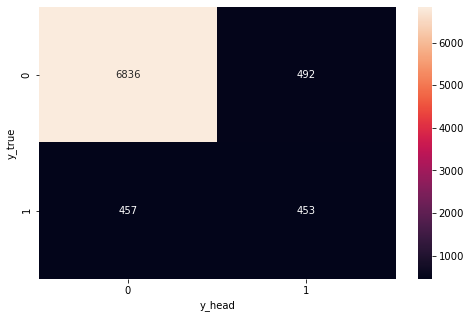

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

**Conclusion:**
    1.  Pemilihan confusion matrix dengan model decision tree dari dataset bank-additional-full.csv adalah digunakan untuk menentukan akurasi pengujian dengan prediksi dari nasabah yang akan berlangganan deposito jangka panjang.

In [29]:
# menggunakan model algoritma support vector machine untuk melakukan prediksi 
model2 = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # prediksi

In [30]:
confusion_matrix(y_test, y_pred) 

array([[6842,  486],
       [ 448,  462]], dtype=int64)

In [31]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7328
           1       0.49      0.51      0.50       910

    accuracy                           0.89      8238
   macro avg       0.71      0.72      0.72      8238
weighted avg       0.89      0.89      0.89      8238



**Visualization** 

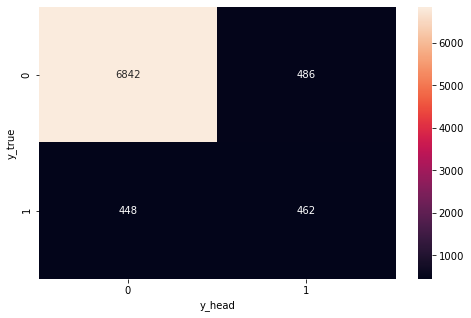

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

**Conclusion:**
    1.  Pemilihan confusion matrix dengan model support vector machine dari dataset bank-additional-full.csv adalah digunakan untuk menentukan akurasi pengujian dengan prediksi dari nasabah yang akan berlangganan deposito jangka panjang. Dari 2 visualisasi menggunakan decision tree dan svm dapat disimpulkan bahwasanya algoritma svm mempunyai tingkat akurasi paling tinggi 0.89 dengan jumlah nilai y_true adalah 6842 seperti pada gambar berwarna cream di atas. 

                                    --- Selesai ---